In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def get_median_and_interquantile_R2(path, start, end):
    total = np.load(path +'\Summary\\testing_rf_r2_'+ '0.npy')[start: ]  # Redwine -5  Graphene -1
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_r2_'+ str(i)+'.npy'
        error_bar = np.load(name)[start: ]
        total = np.vstack((total, error_bar))
    df_ = pd.DataFrame(total)
    
    mean = df_.mean(axis = 0).values
    std = df_.std(axis = 0).values
    
    return mean, std, std

In [ ]:
def get_median_and_interquantile_RMSE(path, start, end):
    total = np.sqrt(np.load(path +'\Summary\\testing_rf_mse_'+ '0.npy')[start: -1])
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_mse_'+ str(i)+'.npy'
        error_bar = np.sqrt(np.load(name)[start: -1])
        total = np.vstack((total, error_bar))
    df_ = pd.DataFrame(total)

    mean = df_.mean(axis = 0).values
    
    std = df_.std(axis = 0).values
    std_error = std/np.sqrt(20)
    
    return mean, std_error, std_error

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    
    # val_str = '{:g}'.format(x)
    val_str = '%.3f'%x
    if np.abs(x) >= 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
major_formatter = FuncFormatter(my_formatter)

def history_plot_rf_with_error_bar(LAL_, LAL_q1, LAL_q3, random, Random_q1, Random_q3, Greedy_, Greedy_q1, Greedy_q3, 
                                   QBC_, QBC_q1, QBC_q3, LCMD_, LCMD_q1, LCMD_q3, title, name, start):
    
    # The font style
    font = {'family': 'monospace', 'size': 20, 'weight':'bold'} #'weight':'bold'
    plt.rc('font', **font)
    fig, ax2 = plt.subplots(figsize=(7.5, 7.5), dpi=300)
    n = 1293
    stop=start + random.shape[0]
    xi = np.arange(start=start, stop=start + random.shape[0]*10, step=10)
    xi = xi/n
    
    x2 = np.arange(start=start, stop=start + random.shape[0]*10, step=10)

    # PLOT: 
    total_acc = 0.9783166601838941
    plt.yticks(rotation=90)
    
    ax = ax2.twiny()
    ax2.plot(x2, np.repeat(total_acc, random.shape[0]), '--', color = "#293241", alpha=0.8, label="All training pool")
    
    ax.plot(xi, random, color="#4895ef", linewidth=5, label="Random", marker="v", markersize=10) 
    # ax.scatter(xi, random, color="#4895ef", marker="v", s=15, alpha=0.6)
    # ax.fill_between(xi, random-(Random_q1), random+(Random_q3), alpha=0.3, edgecolor='#4895ef', facecolor='#4895ef')
    
    ax.plot(xi, QBC_, color="#fe7f2d", label="QBC", linewidth=5, marker="X", markersize=10) 
    # ax.scatter(xi, QBC_, color="#fe7f2d", marker="X", s=15, alpha=0.6)
    # ax.fill_between(xi, QBC_-(QBC_q1), QBC_+(QBC_q3), alpha=0.3, edgecolor='#fe7f2d', facecolor='#fe7f2d')
    
    ax.plot(xi, Greedy_, color="#A663CC", label="Greedy", linewidth=5, marker="o", markersize=10) 
    # ax.scatter(xi, Greedy_, color="#A663CC", marker="o", s=15, alpha=0.6)
    # ax.fill_between(xi, Greedy_-(Greedy_q1), Greedy_+(Greedy_q3), alpha=0.3, edgecolor='#A663CC', facecolor='#A663CC')
    
    ax.plot(xi, LCMD_, color="#8c8a93", label="LCMD", linewidth=5, marker="p", markersize=10) 
    # ax.scatter(xi, LCMD_, color="#8c8a93", marker="p", s=15, alpha=0.6)
    # ax.fill_between(xi, LCMD_-(LCMD_q1), LCMD_+(LCMD_q3), alpha=0.3, edgecolor='#8c8a93', facecolor='#8c8a93')
    
    ax.plot(xi, LAL_, color="#00CC66", label="OMAL", linewidth=5, marker="s", markersize=10) 
    # ax.scatter(xi, LAL_, color="#00CC66", marker=",", s=15, alpha=0.6)
    # ax.fill_between(xi, LAL_-(LAL_q1), LAL_+(LAL_q3), alpha=0.3, edgecolor='#00CC66', facecolor='#00CC66')
    # plt.errorbar(xi, LAL_, yerr=LAL_error_bar, color="#00CC66", alpha=0.3)
    

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
    ax.grid(False)
    # ax.set_title(name, fontsize=30, weight='bold')
    # ax.set_xlabel('Percentage of Labeled Set to Training Pool', fontsize=13)
    # ax2.set_xlabel('Number of Instances', fontsize=13)

    # ax.set_ylim(0.03201, 0.070)
    ax.set_ylabel(title, fontsize=20, weight='bold')
    ax2.set_ylabel(title, fontsize=20, weight='bold')
    # ax.set_ylim(0.001, 0.105)
    # ax.yaxis.set_major_formatter(major_formatter)
    tick_spacing = 0.008
    ax.yaxis.set_major_locator(mtick.MultipleLocator(tick_spacing))
    # ax2.yaxis.set_major_formatter(major_formatter)
         
    # plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    # start from corner
    ax.margins(x=0)
    ax2.margins(x=0)
    fig.tight_layout()
    plt.legend(loc='lower right', fontsize = 22) # lower right
    # plt.savefig('Graphene_R2.png')
    plt.savefig('Graphene_R2_.png',
               bbox_inches="tight",
               pad_inches=0.06)
    plt.show()

In [ ]:
rand, rand_q1, rand_q3 = get_median_and_interquantile_R2('.\Res_Graphene\Random', 0, 0)
omal, omal_q1, omal_q3 = get_median_and_interquantile_R2('.\Res_Graphene\OMAL', 0, 0)
lcmd, lcmd_q1, lcmd_q3 = get_median_and_interquantile_R2('.\Res_Graphene\LCMD', 0, 0)
greedy, greedy_q1, greedy_q3 = get_median_and_interquantile_R2('.\Res_Graphene\Greedy', 0, 0)
QBC, QBC_q1, QBC_q3 = get_median_and_interquantile_R2('.\Res_Graphene\QBC', 0, 0)

In [ ]:
history_plot_rf_with_error_bar(omal, omal_q1, omal_q3, rand, rand_q1, rand_q3, greedy, greedy_q1, greedy_q3, 
                               QBC, QBC_q1, QBC_q3, lcmd, lcmd_q1, lcmd_q3, r'$R^2$', " ", 39)

#Coefficient of Determination
#RMSE r'$R^2$'

In [ ]:
def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    
    # val_str = '{:g}'.format(x)
    val_str = '%.3f'%x
    if np.abs(x) >= 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
major_formatter = FuncFormatter(my_formatter)

def ablation(LAL_, random, Removed, Inversed, title, name, start):
    
    # The font style
    font = {'family': 'monospace', 'size': 20, 'weight':'bold'} #'weight':'bold'
    plt.rc('font', **font)
    fig, ax2 = plt.subplots(figsize=(7.5, 7.5), dpi=300)
    n = 313
    stop=start + random.shape[0]
    xi = np.arange(start=start, stop=start + random.shape[0]*10, step=10)
    xi = xi/n
    
    x2 = np.arange(start=start, stop=start + random.shape[0]*10, step=10)

    # PLOT: 
    total_acc = 0.8694962585338828
    plt.yticks(rotation=90)
    
    ax = ax2.twiny()
    ax2.plot(x2, np.repeat(total_acc, random.shape[0]), '--', color = "#293241", alpha=0.8, label="All training pool")
    
    ax.plot(xi, random, color="#4895ef", linewidth=5, label="Random", marker="v", markersize=10) 
    # ax.scatter(xi, random, color="#4895ef", marker="v", s=15, alpha=0.6)
    # ax.fill_between(xi, random-(Random_q1), random+(Random_q3), alpha=0.3, edgecolor='#4895ef', facecolor='#4895ef')
    
    ax.plot(xi, LAL_, color="#00CC66", label="OMAL", linewidth=5, marker="s", markersize=10) 
    # ax.scatter(xi, LAL_, color="#00CC66", marker=",", s=15, alpha=0.6)
    # ax.fill_between(xi, LAL_-(LAL_q1), LAL_+(LAL_q3), alpha=0.3, edgecolor='#00CC66', facecolor='#00CC66')
    # plt.errorbar(xi, LAL_, yerr=LAL_error_bar, color="#00CC66", alpha=0.3)
    
    # ax.plot(xi, QBC_, color="#fe7f2d", label="QBC", linewidth=5, marker="X", markersize=10) 
    # ax.scatter(xi, QBC_, color="#fe7f2d", marker="X", s=15, alpha=0.6)
    # ax.fill_between(xi, QBC_-(QBC_q1), QBC_+(QBC_q3), alpha=0.3, edgecolor='#fe7f2d', facecolor='#fe7f2d')
    
    ax.plot(xi, Removed, color="#A663CC", label="Removed Model States", linewidth=5, marker="o", markersize=10) 
    # ax.scatter(xi, Greedy_, color="#A663CC", marker="o", s=15, alpha=0.6)
    # ax.fill_between(xi, Greedy_-(Greedy_q1), Greedy_+(Greedy_q3), alpha=0.3, edgecolor='#A663CC', facecolor='#A663CC')
    
    ax.plot(xi, Inversed, color="#8c8a93", label="Inverse Gradient Norms", linewidth=5, marker="p", markersize=10) 
    # ax.scatter(xi, LCMD_, color="#8c8a93", marker="p", s=15, alpha=0.6)
    # ax.fill_between(xi, LCMD_-(LCMD_q1), LCMD_+(LCMD_q3), alpha=0.3, edgecolor='#8c8a93', facecolor='#8c8a93')
    

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
    ax.grid(False)
    # ax.set_title(name, fontsize=30, weight='bold')
    # ax.set_xlabel('Percentage of Labeled Set to Training Pool', fontsize=13)
    # ax2.set_xlabel('Number of Instances', fontsize=13)

    # ax.set_ylim(0.03201, 0.070)
    ax.set_ylabel(title, fontsize=20, weight='bold')
    ax2.set_ylabel(title, fontsize=20, weight='bold')
    # ax.set_ylim(0.001, 0.105)
    # ax.yaxis.set_major_formatter(major_formatter)
    # tick_spacing = 0.008
    # ax.yaxis.set_major_locator(mtick.MultipleLocator(tick_spacing))
    # ax2.yaxis.set_major_formatter(major_formatter)
         
    # plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    # start from corner
    ax.margins(x=0)
    ax2.margins(x=0)
    fig.tight_layout()
    plt.legend(loc='lower right', fontsize = 18) # lower right
    # plt.savefig('Graphene_R2.png')
    plt.savefig('Auto_ablation.png',
               bbox_inches="tight",
               pad_inches=0.06)
    plt.show()

In [ ]:
def get_median_and_interquantile_R2_1(path, start, end):
    total = np.load(path +'\Summary\\testing_rf_r2_'+ '0.npy')[start: ]  # Redwine -5  Graphene -1
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_r2_'+ str(i)+'.npy'
        error_bar = np.load(name)[start: ]
        total = np.vstack((total, error_bar))
    df_ = pd.DataFrame(total)
    
    median_ = df_.median(axis = 0).values
    mean = df_.mean(axis = 0).values
    
    # q1 = median_-df_.quantile(.25).values
    # q3 = df_.quantile(.75).values-median_
    # min_ = df_.min(axis = 0).values
    # max_ = df_.max(axis = 0).values
    
    std = df_.std(axis = 0).values
    
    return mean, std, std

In [ ]:
rand, rand_q1, rand_q3 = get_median_and_interquantile_R2_1('.\\AutoMPG_analysis_Exps\\Res_AutoMPG\\Random_initial_10', 3, 0)
omal, omal_q1, omal_q3 = get_median_and_interquantile_R2_1('.\\AutoMPG_analysis_Exps\\Res_AutoMPG\\OMAL_inital10', 3, 0)
removed, removed_q1, removed_q3 = get_median_and_interquantile_R2_1('.\\AutoMPG_analysis_Exps\\Res_AutoMPG\\OMAL_initial_10_removed', 3, 0)
inverse, inverse_q1, inverse_q3 = get_median_and_interquantile_R2_1('.\\AutoMPG_analysis_Exps\\Res_AutoMPG\\OMAL_inital_10_inverse', 3, 0)

In [ ]:
ablation(omal, rand, removed, inverse, r'$R^2$', " ", 61)

In [ ]:
# The Analysis Plots:
from sklearn.ensemble import RandomForestRegressor
seed_rf = np.load(file="..\seed2.npy")
# rf_model = RandomForestRegressor(random_state=seed_rf[0], n_estimators=100)

In [26]:
name1 = "..\\Results\\Res_NO2\\OMAL\\Summary\\used_data0.npy"
name2 = "..\\Datasets\\NO2\\X_train0.npy"
name3 = "..\\Datasets\\NO2\\y_train0.npy"

(312, 7)
312


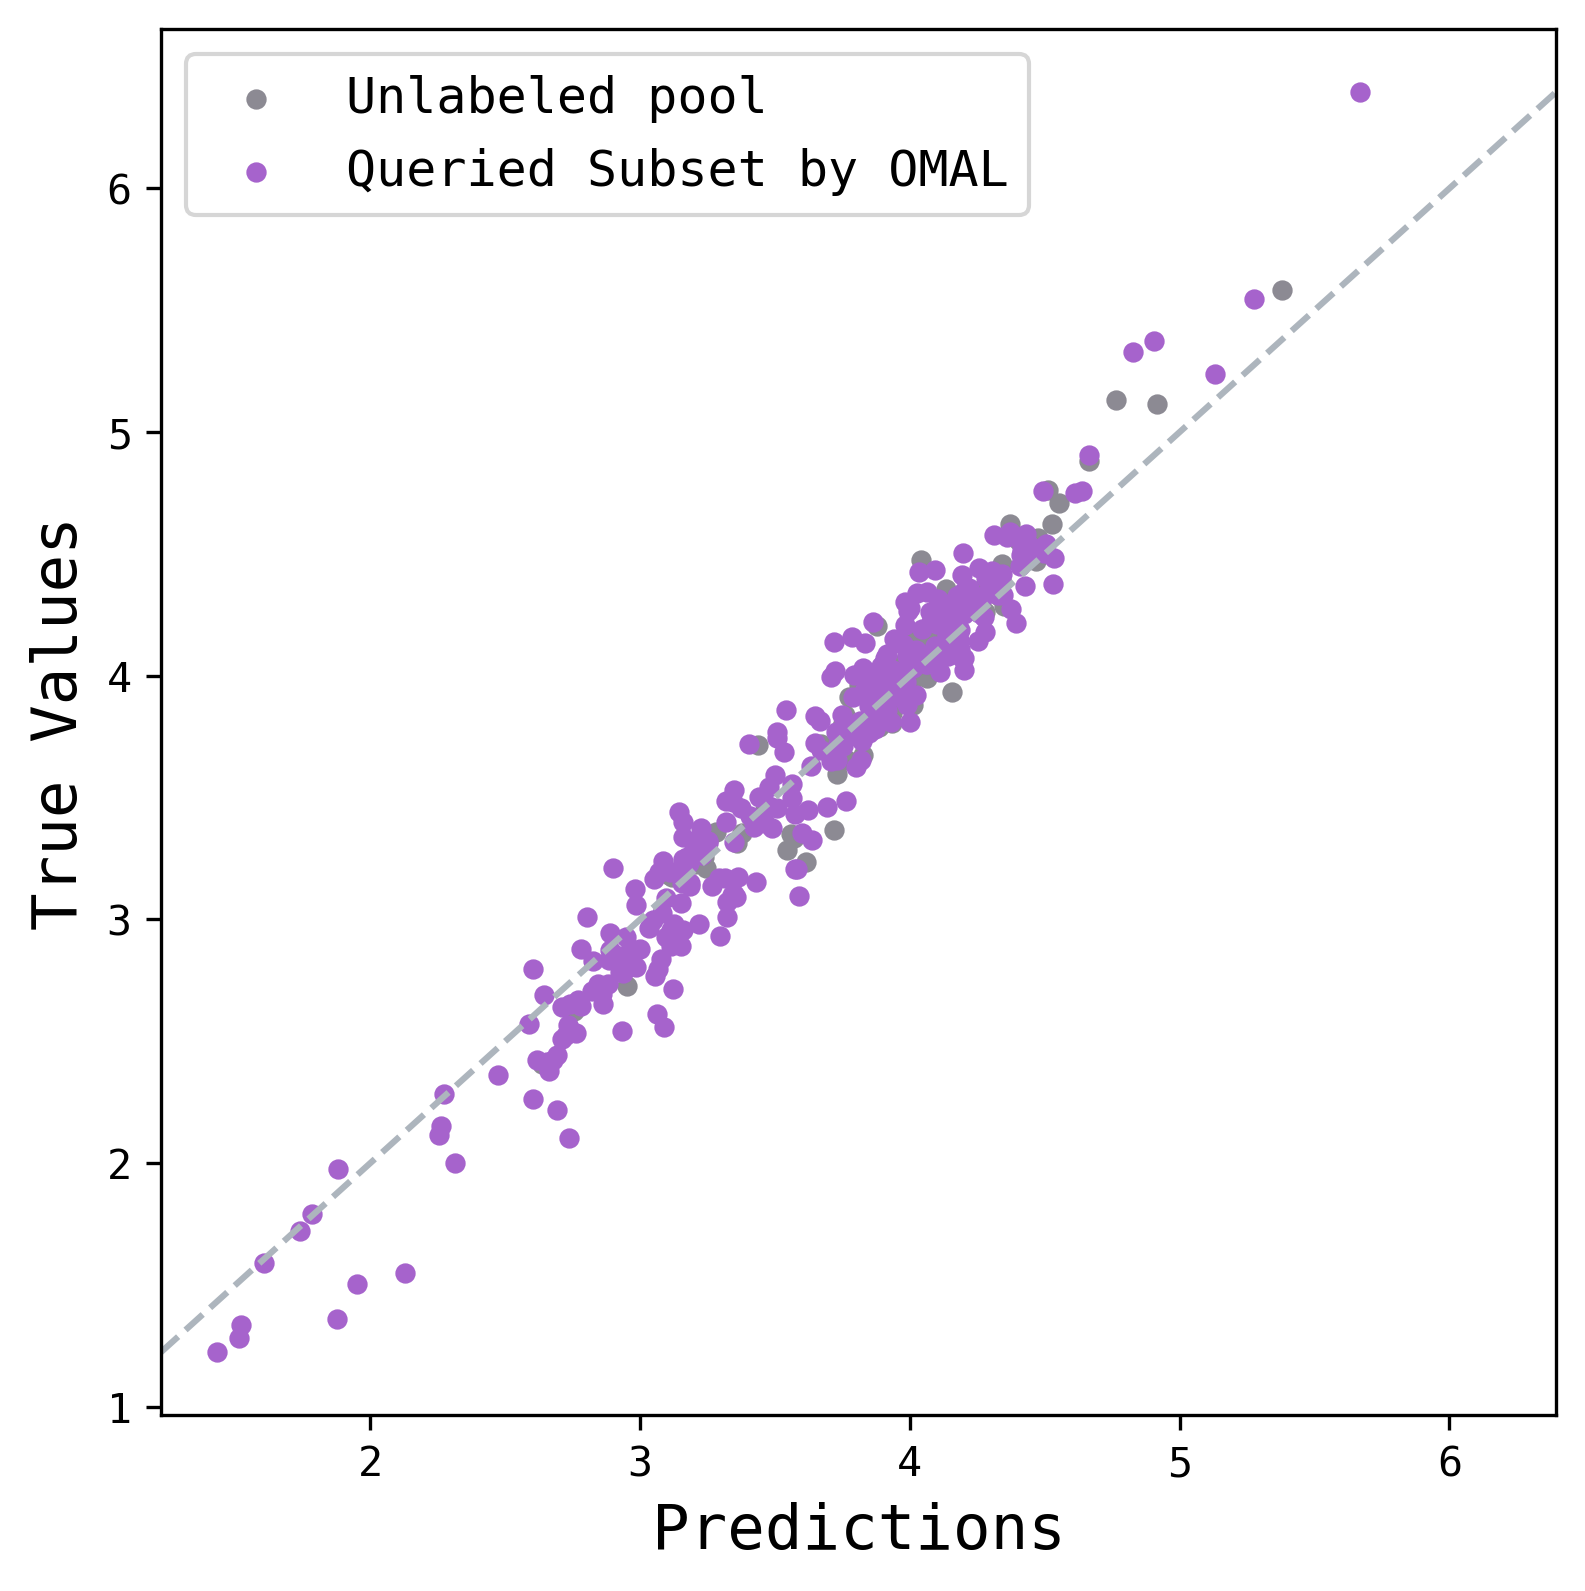

(88, 3)
(312, 3)


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
# Training data
x = np.array(np.load(name2, allow_pickle=True).astype(np.float32))
# Training label
y = np.array(np.load(name3, allow_pickle=True).astype(np.float32).reshape(-1, 1))
# Used data
x2 = np.array(np.load(name1))
print(x2.shape)

seed_rf = np.load(file="..\seed2.npy")
rf_model = RandomForestRegressor(random_state=seed_rf[0], n_estimators=100)
              
rf_model.fit(x, y.ravel())
y_pred = rf_model.predict(x)
# loss = np.abs(y.reshape(1, -1)-y_pred).reshape(-1,1)

dfA = pd.DataFrame(x)
dfB = pd.DataFrame(x2)
dfC = pd.merge(dfB, dfA.reset_index())
indices = dfC['index'].tolist() # training set 的index
print(len(indices))                      
# tsne = TSNE(n_components=2, verbose=1, random_state=2, learning_rate='auto', init='pca', n_iter=5000)
# z = tsne.fit_transform(x)
df = pd.DataFrame()

# df["Dim-1"] = z[:,0]
# df["Dim-2"] = z[:,1]
# df["loss"] = loss
df['predicted_label'] = y_pred
df["label_value"] = y
df["id"] = df.index
point1 = [np.min(df["label_value"]), np.min(df["label_value"])]
point2 = [np.max(df["label_value"]), np.max(df["label_value"])]

retD = list(set(df["id"].tolist()).difference(set(indices)))

# df['class'] = 0
df_ = df.iloc[indices]
df = df.iloc[retD]

# df['class'].iloc[indices] = "Labeled"
# df['class'].iloc[retD] = "Pool"

# print(df)

font = {'family': 'monospace', 'size': 10}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color="#ADB5BD", linestyle="--")

# ax.scatter(df["predicted_label"], df["label_value"], c=df["loss"], vmin=np.min(df["loss"]), vmax=np.max(df["loss"]), label="Training Pool", cmap="BuGn", s=30)
# ax.scatter(df_["predicted_label"], df_["label_value"], c=df_["loss"], vmin=np.min(df["loss"]), vmax=np.max(df["loss"]), label="Labeled by OMAL", marker=",", cmap="BuGn", s=60)

ax.scatter(df["predicted_label"], df["label_value"],label="Unlabeled pool", color="#8c8a93", s=15)
ax.scatter(df_["predicted_label"], df_["label_value"],label="Queried Subset by OMAL", color="#A663CC", s=15)

# tick_spacing = 50
# ax.yaxis.set_major_locator(mtick.MultipleLocator(tick_spacing))

ax.grid(False)
# ax.set_title("AutoMPG")
ax.set_xlabel('Predictions', fontsize=15)
ax.set_ylabel("True Values", fontsize=15)

# start from corner
ax.margins(x=0)
plt.legend(fontsize=12)
plt.savefig('NO2_OMAL_plot.png',
               bbox_inches="tight",
               pad_inches=0.03)
plt.show()
print(df.shape)
print(df_.shape)

In [ ]:
## PCA Visualization:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

# Unlabelled pool:
x = np.load('..\\Datasets\\Diabetes\\X_train0.npy').astype(np.float32)

# Queried samples:
x2 =  np.load("..\\Results\\Res_Diabetes\\Random\\Summary\\used_data0.npy").astype(np.float32)

dfA = pd.DataFrame(x)
dfB = pd.DataFrame(x2)
dfC = pd.merge(dfB, dfA.reset_index())
indices = dfC['index'].tolist() # training set 的index

pca = PCA(n_components=2, random_state=1)
principalComponents = pca.fit_transform(x)
df = pd.DataFrame(data = principalComponents, columns = ['Dim-1', 'Dim-2'])
df["id"] = df.index
                                       
df_ = df.iloc[indices]

font = {'family': 'monospace', 'size': 10}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
    
ax.scatter(df["Dim-1"], df["Dim-2"], color="#8c8a93", label="Unlabeled pool")
ax.scatter(df_["Dim-1"], df_["Dim-2"], color="#fe7f2d", label="Queried Subset by OMAL")

ax.grid(False)
ax.set_title("PCA Visualization")
ax.set_xlabel('Dim-1')
ax.set_ylabel("Dim-2")

# start from corner

plt.legend()
plt.savefig('Overall-Compare-2.png')
plt.show()

In [ ]:
import seaborn as sns
from scipy import stats
x = np.array(np.load('..\\Datasets\\Silver\\y_train0.npy'))
x2 =  np.array(np.load('..\\Results\\Res_Silver\\OMAL\\Summary\\used_labels0.npy')) #[:-40]
print(x2.shape)

font = {'family': 'monospace', 'size': 10}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax = sns.distplot(x, color="gray", label="Unlabelled Pool")
ax = sns.distplot(x2, color="darkorchid", label="Queried Subset by OMAL")
 
plt.legend()
plt.savefig('Silver_Distribution_OMAL.png',
               bbox_inches="tight",
               pad_inches=0.03)
plt.show()

In [ ]:
def get_median_and_interquantile_rmse(path, start, end):
    total = np.sqrt(np.load(path +'\Summary\\testing_rf_mse_'+ '0.npy')[start: ])
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_mse_'+ str(i)+'.npy'
        error_bar = np.sqrt(np.load(name)[start: ])
        total = np.vstack((total, error_bar))
    df_ = pd.DataFrame(total)
    
    # df_ = df_.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=1)
    median_ = df_.median(axis = 0).values
    mean = df_.mean(axis = 0).values
    max_ = df_.max(axis = 0).values
    min_= df_.min(axis = 0).values
    
    q1 = df_.quantile(.25).values
    q3 = df_.quantile(.75).values
    
    std = df_.std(axis = 0).values
    
    return df_.values, std, std

In [ ]:
def get_median_and_interquantile_R2(path, start, end):
    total = np.load(path +'\Summary\\testing_rf_r2_'+ '0.npy')[start: ]
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_r2_'+ str(i)+'.npy'
        error_bar = np.load(name)[start: ]
        total = np.vstack((total, error_bar))
    df_ = pd.DataFrame(total)
    
    # df_ = df_.apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=1)
    median_ = df_.median(axis = 0).values
    mean = df_.mean(axis = 0).values
    
    # q1 = median_-df_.quantile(.25).values
    # q3 = df_.quantile(.75).values-median_
    
    min_ = df_.min(axis = 0).values
    max_ = df_.max(axis = 0).values
    
    std = df_.std(axis = 0).values
    
    return df_.values, std, std

In [ ]:
rand, rand_q1, rand_q3 = get_median_and_interquantile_R2('.\Res_Graphene\Random', 5, 0)
omal, omal_q1, omal_q3 = get_median_and_interquantile_R2('.\Res_Graphene\OMAL',5, 0)
lcmd, lcmd_q1, lcmd_q3 = get_median_and_interquantile_R2('.\Res_Graphene\LCMD',5, 0)
greedy, greedy_q1, greedy_q3 = get_median_and_interquantile_R2('.\Res_Graphene\Greedy', 5, 0)
QBC, QBC_q1, QBC_q3 = get_median_and_interquantile_R2('.\Res_Graphene\QBC',5, 0)
print(rand.shape)

In [ ]:
def func_count_first_place(arr1, arr2, arr3, arr4):
    place_0 = 0
    place_1 = 0
    place_2 = 0
    place_3 = 0
    
    for i in range(arr1.shape[1]):
        val_1 = arr1[:,i].reshape(-1,1)
        val_2 = arr2[:,i].reshape(-1,1)
        val_3 = arr3[:,i].reshape(-1,1)
        val_4 = arr4[:,i].reshape(-1,1)
        
        val_1 = np.hstack((val_1, val_2))
        val_1 = np.hstack((val_1, val_3))
        val_1 = np.hstack((val_1, val_4))
        
        index = np.argmax(val_1, axis=1)
        Unique, counts = np.unique(index, return_counts=True)

        for i in range(len(Unique)):
            unique = Unique[i]
            if unique==0:
                place_0 += counts[i]
            if unique==1:
                place_1 += counts[i]   
            if unique==2:
                place_2 += counts[i]
            if unique==3:
                place_3 += counts[i]
        # print(dict(zip(unique, counts)))
        
    print(place_0)
    print(place_1)
    print(place_2)
    print(place_3)

In [ ]:
func_count_first_place(omal, lcmd, greedy, QBC)

In [ ]:
def func_count_second_place(arr1, arr2, arr3, arr4):
    place_0 = 0
    place_1 = 0
    place_2 = 0
    place_3 = 0
    
    for i in range(arr1.shape[1]):
        val_1 = arr1[:,i].reshape(-1,1)
        val_2 = arr2[:,i].reshape(-1,1)
        val_3 = arr3[:,i].reshape(-1,1)
        val_4 = arr4[:,i].reshape(-1,1)
        
        val_1 = np.hstack((val_1, val_2))
        val_1 = np.hstack((val_1, val_3))
        val_1 = np.hstack((val_1, val_4))
        
        # index = np.argmax(val_1, axis=1)
        index = val_1.argsort()[:,-2]
        
        Unique, counts = np.unique(index, return_counts=True)

        for i in range(len(Unique)):
            unique = Unique[i]
            if unique==0:
                place_0 += counts[i]
            if unique==1:
                place_1 += counts[i]   
            if unique==2:
                place_2 += counts[i]
            if unique==3:
                place_3 += counts[i]
        # print(dict(zip(unique, counts)))
        
    print(place_0)
    print(place_1)
    print(place_2)
    print(place_3)
    
    print("Total:", place_0+place_1+place_2+place_3 )

In [ ]:
func_count_second_place(omal, lcmd, greedy, QBC)

In [ ]:
# print(rand.shape)
# print((rand))
# print((lcmd))
# print((greedy))
# print((QBC))
# print((omal))

In [ ]:
print(np.mean(rand[8:17]))
print(np.mean(lcmd[8:17]))
print(np.mean(greedy[8:17]))
print(np.mean(QBC[8:17]))
print(np.mean(omal[8:17]))

In [ ]:
print(np.mean(rand[17:26]))
print(np.mean(lcmd[17:26]))
print(np.mean(greedy[17:26]))
print(np.mean(QBC[17:26]))
print(np.mean(omal[17:26]))

In [ ]:
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    
    # val_str = '{:g}'.format(x)
    val_str = '%.3f'%x
    if np.abs(x) >= 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
major_formatter = FuncFormatter(my_formatter)

def Q3_plots(LAL_, LAL_q1, LAL_q3, random, Random_q1, Random_q3, Greedy_, Greedy_q1, Greedy_q3, 
                                   QBC_, QBC_q1, QBC_q3, LCMD_, LCMD_q1, LCMD_q3, title, name, start):
    
    # The font style
    font = {'family': 'monospace', 'size': 20, 'weight':'bold'} #'weight':'bold'
    plt.rc('font', **font)
    fig, ax2 = plt.subplots(figsize=(7.5, 7.5), dpi=300)
    n = 353
    stop=start + random.shape[0]
    xi = np.arange(start=start, stop=start + random.shape[0]*40, step=40)
    xi = xi/n
    
    x2 = np.arange(start=start, stop=start + random.shape[0]*40, step=40)

    # PLOT: 
    # total_acc = 50
    plt.yticks(rotation=90)
    
    ax = ax2.twiny()
    # ax2.plot(x2, np.repeat(total_acc, random.shape[0]), '--', color = "#293241", alpha=0.8, label="All training pool")
    
    ax.plot(xi, random, color="#4895ef", linewidth=5, label="Random", marker="v", markersize=10) 
    # ax.scatter(xi, random, color="#4895ef", marker="v", s=15, alpha=0.6)
    # ax.fill_between(xi, random-(Random_q1), random+(Random_q3), alpha=0.3, edgecolor='#4895ef', facecolor='#4895ef')
    
    ax.plot(xi, QBC_, color="#fe7f2d", label="QBC", linewidth=5, marker="X", markersize=10) 
    # ax.scatter(xi, QBC_, color="#fe7f2d", marker="X", s=15, alpha=0.6)
    # ax.fill_between(xi, QBC_-(QBC_q1), QBC_+(QBC_q3), alpha=0.3, edgecolor='#fe7f2d', facecolor='#fe7f2d')
    
    ax.plot(xi, Greedy_, color="#A663CC", label="Greedy", linewidth=5, marker="o", markersize=10) 
    # ax.scatter(xi, Greedy_, color="#A663CC", marker="o", s=15, alpha=0.6)
    # ax.fill_between(xi, Greedy_-(Greedy_q1), Greedy_+(Greedy_q3), alpha=0.3, edgecolor='#A663CC', facecolor='#A663CC')
    
    ax.plot(xi, LCMD_, color="#8c8a93", label="LCMD", linewidth=5, marker="p", markersize=10) 
    # ax.scatter(xi, LCMD_, color="#8c8a93", marker="p", s=15, alpha=0.6)
    # ax.fill_between(xi, LCMD_-(LCMD_q1), LCMD_+(LCMD_q3), alpha=0.3, edgecolor='#8c8a93', facecolor='#8c8a93')
    
    ax.plot(xi, LAL_, color="#00CC66", label="OMAL", linewidth=5, marker="s", markersize=10) 
    # ax.scatter(xi, LAL_, color="#00CC66", marker=",", s=15, alpha=0.6)
    # ax.fill_between(xi, LAL_-(LAL_q1), LAL_+(LAL_q3), alpha=0.3, edgecolor='#00CC66', facecolor='#00CC66')
    # plt.errorbar(xi, LAL_, yerr=LAL_error_bar, color="#00CC66", alpha=0.3)
    

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
    ax.grid(False)
    # ax.set_title(name, fontsize=30, weight='bold')
    # ax.set_xlabel('Percentage of Labeled Set to Training Pool', fontsize=13)
    # ax2.set_xlabel('Number of Instances', fontsize=13)

    # ax.set_ylim(0.921, 0.991)
    ax.set_ylabel(title, fontsize=20, weight='bold')
    ax2.set_ylabel(title, fontsize=20, weight='bold')
    # ax.set_ylim(0.001, 0.105)
    # ax.yaxis.set_major_formatter(major_formatter)
    # tick_spacing = 0.06
     #ax.yaxis.set_major_locator(mtick.MultipleLocator(tick_spacing))
    # ax2.yaxis.set_major_formatter(major_formatter)
         
    # plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    # start from corner
    ax.margins(x=0)
    ax2.margins(x=0)
    fig.tight_layout()
    # plt.legend(loc='upper right', fontsize = 22) # lower right
    # plt.savefig('Graphene_R2.png')
    plt.savefig('Max_MSE.png',
               bbox_inches="tight",
               pad_inches=0.06)
    plt.show()

In [ ]:
def get_R2(path, start, end):
    total = np.load(path +'\Summary\\testing_rf_r2_'+ '0.npy')[start: ]
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_r2_'+ str(i)+'.npy'
        error_bar = np.load(name)[start: ]
        total = np.vstack((total, error_bar))
    
    df_ = pd.DataFrame(total)
#     median_ = df_.median(axis = 0).values
#     mean = df_.mean(axis = 0).values
    
#     q1 = median_-df_.quantile(.25).values
#     q3 = df_.quantile(.75).values-median_
    
    min_ = df_.min(axis = 0).values
#     max_ = df_.max(axis = 0).values
    
#     std = df_.std(axis = 0).values
    
    return min_, min_, min_

In [ ]:
def get_RMSE(path, start, end):
    total = np.sqrt(np.load(path +'\Summary\\testing_rf_mse_'+ '0.npy')[start: ])
    for i in range(1, 20, 1):
        name = path + '\Summary\\testing_rf_mse_'+ str(i)+'.npy'
        error_bar = np.sqrt(np.load(name)[start: ])
        total = np.vstack((total, error_bar))

    df_ = pd.DataFrame(total)
    
#     median_ = df_.median(axis = 0).values
#     mean = df_.mean(axis = 0).values
    
#     q1 = df_.quantile(.25).values
#     q3 = df_.quantile(.75).values
    max_ = df_.max(axis = 0).values
#     min_ = df_.min(axis = 0).values
    
#     std = df_.std(axis = 0).values
    
    return max_, max_, max_

In [ ]:
rand, rand_q1, rand_q3 = get_RMSE('.\Res_Silver\Random', 0, 0)
omal, omal_q1, omal_q3 = get_RMSE('.\Res_Silver\OMAL', 0, 0)
lcmd, lcmd_q1, lcmd_q3 = get_RMSE('.\Res_Silver\LCMD', 0, 0)
greedy, greedy_q1, greedy_q3 = get_RMSE('.\Res_Silver\Greedy', 0, 0)
QBC, QBC_q1, QBC_q3 = get_RMSE('.\Res_Silver\QBC', 0, 0)

In [ ]:
Q3_plots(omal, omal_q1, omal_q3, rand, rand_q1, rand_q3, greedy, greedy_q1, greedy_q3, 
                               QBC, QBC_q1, QBC_q3, lcmd, lcmd_q1, lcmd_q3, r'$RMSE$', " ", 10)

In [ ]:
def gaps(training_score, testing_score):
    gap = training_score - testing_score
    return gap

In [ ]:
from matplotlib.ticker import FuncFormatter
def my_formatter(x, pos):
    """Format 1 as 1, 0 as 0, and all values whose absolute values is between
    0 and 1 without the leading "0." (e.g., 0.7 is formatted as .7 and -0.4 is
    formatted as -.4)."""
    
    # val_str = '{:g}'.format(x)
    val_str = '%.3f'%x
    if np.abs(x) >= 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
major_formatter = FuncFormatter(my_formatter)

def history_plot_rf(QBC_, LAL_,  Greedy_,  random,  LCMD_,  title, name, start):
    
    # The font style
    font = {'family': 'monospace', 'size': 20, 'weight':'bold'} #'weight':'bold'
    plt.rc('font', **font)
    fig, ax2 = plt.subplots(figsize=(7.5, 7.5), dpi=300)
    n = 353
    stop=start + QBC_.shape[0]
    xi = np.arange(start=start, stop=start + QBC_.shape[0]*10, step=10)
    xi = xi/n
    
    x2 = np.arange(start=start, stop=start + QBC_.shape[0]*10, step=10)

    # PLOT: 
    total_acc = 0.4025933354812975
    plt.yticks(rotation=90)
    
    
    ax = ax2.twiny()
    ax2.plot(x2, np.repeat(total_acc, QBC_.shape[0]), '--', color = "#293241", alpha=0.8, label="All training pool")
    
    ax.plot(xi, random, color="#4895ef", linewidth=5, label="Random", marker="v", markersize=10) 
    # ax.scatter(xi, random, color="#4895ef", marker="v", s=15, alpha=0.6)
    # ax.fill_between(xi, random-(Random_error_bar), random+(Random_error_bar), alpha=0.3, edgecolor='#4895ef', facecolor='#4895ef')
    
    # ax.plot(xi, QBC_, color="#fe7f2d", label="QBC", linewidth=5, marker="X", markersize=10) 
    # ax.scatter(xi, QBC_, color="#fe7f2d", marker="X", s=15, alpha=0.6)
    # ax.fill_between(xi, QBC_-(QBC_error_bar), QBC_+(QBC_error_bar), alpha=0.3, edgecolor='#fe7f2d', facecolor='#fe7f2d')
    
    ax.plot(xi, Greedy_, color="#A663CC", label="Removed Model States", linewidth=5, marker="o", markersize=10) 
    # ax.scatter(xi, Greedy_, color="#A663CC", marker="o", s=15, alpha=0.6)
    # ax.fill_between(xi, Greedy_-(Greedy_error_bar), Greedy_+(Greedy_error_bar), alpha=0.3, edgecolor='#A663CC', facecolor='#A663CC')
    
    ax.plot(xi, LCMD_, color="#8c8a93", label="Inverse Gradient Norms", linewidth=5, marker="p", markersize=10) 
    # ax.scatter(xi, LCMD_, color="#8c8a93", marker="p", s=15, alpha=0.6)
    # ax.fill_between(xi, LCMD_-(LCMD_error_bar), LCMD_+(LCMD_error_bar), alpha=0.3, edgecolor='#8c8a93', facecolor='#8c8a93')
    
    ax.plot(xi, LAL_, color="#00CC66", label="OMAL", linewidth=5, marker="s", markersize=10) 
    # ax.scatter(xi, LAL_, color="#00CC66", marker=",", s=15, alpha=0.6)
    # ax.fill_between(xi, LAL_-(LAL_error_bar), LAL_+(LAL_error_bar), alpha=0.3, edgecolor='#00CC66', facecolor='#00CC66')
    # plt.errorbar(xi, LAL_, yerr=LAL_error_bar, color="#00CC66", alpha=0.3)
    

    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
    ax.grid(False)
    # ax.set_title(name, fontsize=30, weight='bold')
    # ax.set_xlabel('Percentage of Labeled Set to Training Pool', fontsize=13)
    # ax2.set_xlabel('Number of Instances', fontsize=13)
    ax.set_ylabel(title, fontsize=20, weight='bold')
    ax2.set_ylabel(title, fontsize=20, weight='bold')
    ax.yaxis.set_major_formatter(major_formatter)
#     ax2.yaxis.set_major_formatter(major_formatter)
    
    
    # start from corner
    ax.margins(x=0)
    ax2.margins(x=0)
    fig.tight_layout()
    plt.legend(loc='lower right', fontsize = 22)
    plt.savefig('Diabetes_R2.png',
               bbox_inches="tight",
               pad_inches=0.02)
    plt.show()

In [ ]:
MALR = np.load('./Diabetes/diabetes_batch_MAL/featureEmbeddings/Averaged_dia/testing_rf_r2_MAL-10.npy')[11:-1]

Random = np.load('./Diabetes/res_Random/featureEmbeddings/Averaged_dia/testing_rf_r2_Random-10.npy')[11:-1]

Inverse = np.load('./Diabetes/res_MAL_inverse/featureEmbeddings/Averaged_dia/testing_rf_r2_MAL-10.npy')[11:-1]

Removed = np.load('./Diabetes/res_MAL_remove/featureEmbeddings/Averaged_dia/testing_rf_r2_MAL-10.npy')[11:-1]
print(Removed.shape)
print(Inverse.shape)
history_plot_rf(MALR, MALR, Removed, Random, Inverse, 
                               "Coefficient of Determination", "Graphene Oxide", 70)

In [ ]:
from numpy import mean
from numpy import var
from math import sqrt
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import mannwhitneyu
from scipy import stats

MALR = np.load('./Graphene_Oxide_Bulk/res_MAL_2/featureEmbeddings/Averaged_dia/testing_rf_mse_MAL-10.npy')[34:-1]
 
QBC = np.load('./Graphene_Oxide_Bulk/res_QBC/featureEmbeddings/Averaged_dia/testing_rf_mse_QBC-10.npy')[34:-1]

Greedy = np.load('./Graphene_Oxide_Bulk/res_Greedy_new/featureEmbeddings/Averaged_dia/testing_rf_mse_Greedy-10.npy')[0:-1]

Random = np.load('./Graphene_Oxide_Bulk/res_Random1/featureEmbeddings/Averaged_dia/testing_rf_mse_Random-10.npy')[34:-1]

icmd = np.load('./Graphene_Oxide_Bulk/res_lcmd/featureEmbeddings/Averaged_dia/testing_rf_mse_MAL-10.npy')[34:-1]

print(Greedy.shape)
# print(icmd.shape)
# print(Greedy.shape)
# # t, p = stats.ttest_ind(MALR, icmd, alternative="greater")
# t, p = stats.wilcoxon(MALR, Random)
# print("Our:","{:.3e}".format(p))
# print('%.3f' % cohend(MALR, Random))
# t, p = stats.wilcoxon(icmd, Random)
# print("LCMD:","{:.3e}".format(p))
# print('%.3f' % cohend(icmd, Random))
# t, p = stats.wilcoxon(Greedy, Random)
# print("Greedy:", "{:.3e}".format(p))
# print('%.3f' % cohend(Greedy, Random))
# t, p = stats.wilcoxon(QBC, Random)
# print("QBC:","{:.3e}".format(p))
# print('%.3f' % cohend(QBC, Random))

In [ ]:
from scipy.stats import rankdata

for i in range(20):
    a_list = []
    malr = np.load('./Silver/Silver_batch_MAL/featureEmbeddings/Summary_dia/testing_rf_mse_MAL-'+str(i)+'.npy')[21]
    QBC = np.load('./Silver/res_QBC/featureEmbeddings/Summary_dia/testing_rf_mse_QBC-'+str(i)+'.npy')[21]
    Greedy = np.load('./Silver/res_Greedy_new2/featureEmbeddings/Summary_dia/testing_rf_mse_Greedy-'+str(i)+'.npy')[21]
    Random = np.load('./Silver/res_Random/featureEmbeddings/Summary_dia/testing_rf_mse_Random-'+str(i)+'.npy')[21]
    icmd = np.load('./Silver/batch_ICMD/featureEmbeddings/Summary_dia/testing_rf_mse_MAL-'+str(i)+'.npy')[21]
    print(QBC)
    print(Random)
    
#     a_list.append(malr)
#     a_list.append(QBC)
#     a_list.append(Greedy)
#     a_list.append(Random)
#     a_list.append(icmd)
    
#     res = np.asarray(a_list)
#     rank = rankdata(res, method='min')
#     if rank[0] == 1:
#         count = count+1
#     if rank[0] == 2:
#         count_2=count_2+1
        

#     print(res)
#     print(rank)
    
        


In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import t

def t_test_res(data1, data2, alt):
    t, p = stats.ttest_ind(data1, data2, alternative=alt)
    return t, p
    
# def t_test_res(x1, x2,alternative):
#     n1 = x1.size
#     n2 = x2.size
#     m1 = np.mean(x1)
#     m2 = np.mean(x2)
#     v1 = np.var(x1, ddof=1)
#     v2 = np.var(x2, ddof=1)
#     tstat = (m1 - m2) / np.sqrt(v1 / n1 + v2 / n2)
#     df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
#     if alternative == "equal":
#         p = 2 * t.cdf(-abs(tstat), df)
#     if alternative == "lesser":
#         p = t.cdf(tstat, df)
#     if alternative == "greater":
#         p = 1-t.cdf(tstat, df)
#     return tstat, df, p
        
def t_test(path1, path2):
    win_count = 0
    total_iteration = 0
    
    list_1 = []
    list_2 = []
    
    for i in range(0, 20):
        
        res1 = np.load(path1+'-'+str(i)+'.npy')[6:-1]
        list_1.append(res1)
        
        res2 = np.load(path2+'-'+str(i)+'.npy')[6:-1]
        list_2.append(res2)

    data_df1 = pd.DataFrame(list_1)
    data_df2 = pd.DataFrame(list_2)

    for j in range(data_df1.shape[1]):
        total_iteration += 1
        
        our = data_df1.iloc[:, j]
        # print(our)
        comparision = data_df2.iloc[:, j]
        # print(comparision)
        # print("___")
        t, p = stats.wilcoxon(our, comparision)
        print(p)
        if p/2 < 0.05:
            win_count += 1
        
    return win_count/total_iteration 

MALR = './Diabetes/diabetes_batch_MAL/featureEmbeddings/Summary_dia/testing_rf_r2_MAL'
QBC = './Diabetes/res_QBC/featureEmbeddings/Summary_dia/testing_rf_r2_QBC'


t_test(MALR, QBC)
# print(np.load('./Diabetes/diabetes_batch_MAL/featureEmbeddings/Averaged_dia/testing_rf_r2_MAL-10.npy')[5:-1])    